# TASK-3 : IRIS FLOWER CLASSIFICATION

## AIM:
to develop a machine learning model that can predict the species of an iris flower based on sepal length and width, petal length and width.

## Import Libraries

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [132]:
df = pd.read_csv("IRIS.csv")

In [133]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [135]:
df.shape

(150, 5)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [137]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [139]:
df.duplicated().sum()

3

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df.duplicated().sum()

0

## Visualization

In [143]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

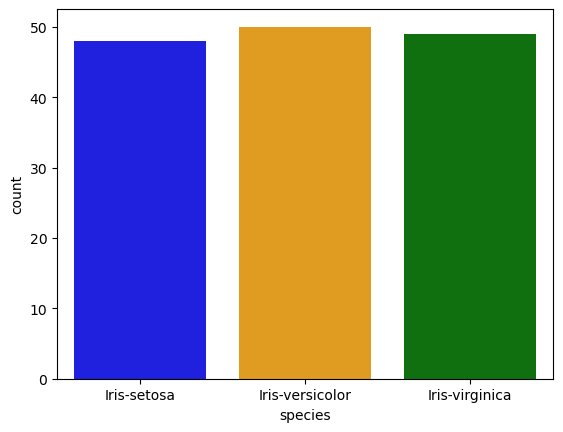

In [144]:
sns.countplot(x='species', data=df, palette=('blue','orange','g'))
plt.show()

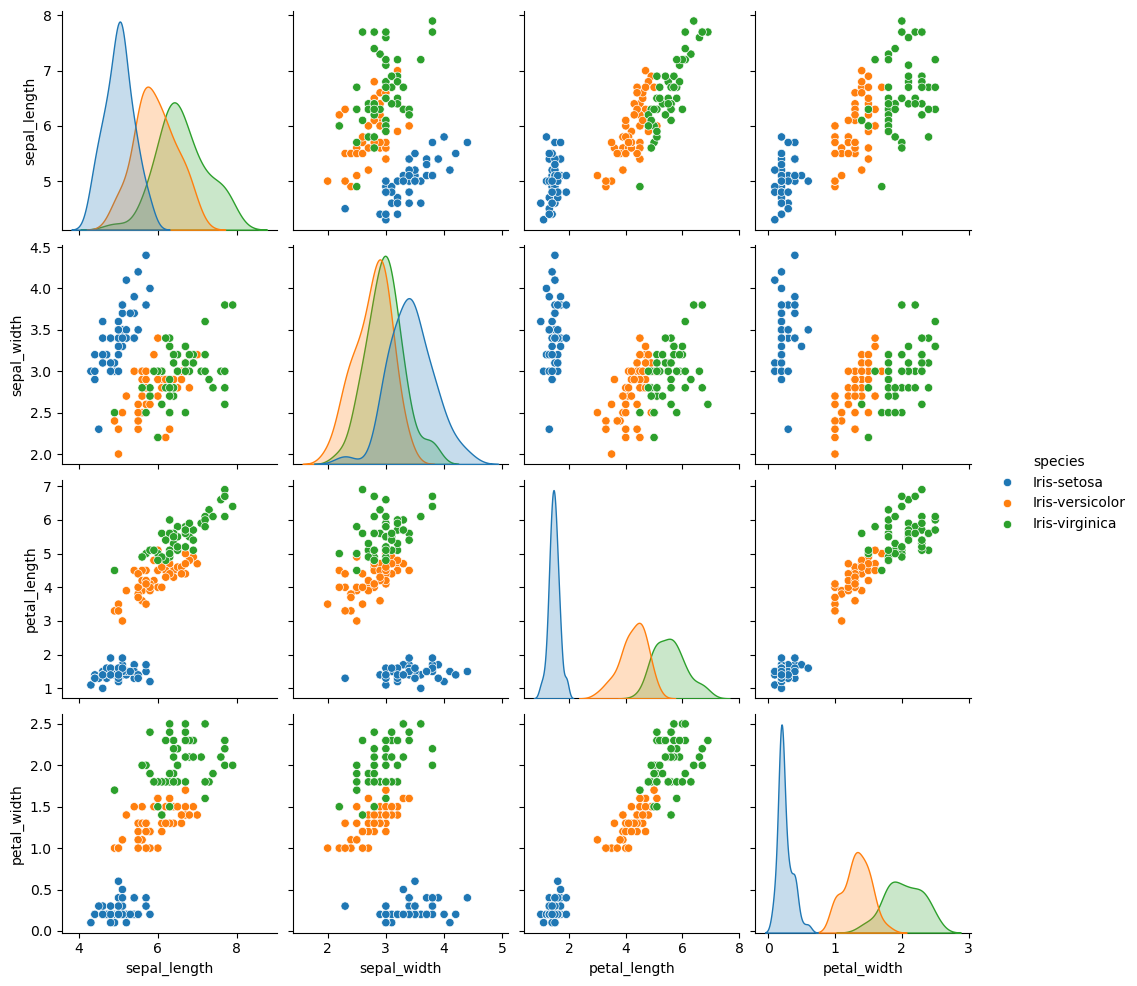

In [145]:
sns.pairplot(df, hue="species")
plt.show()

## Encoder

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
lab_enc= LabelEncoder()

In [149]:
df['species']= lab_enc.fit_transform(df['species'])

In [150]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## Standard Scaler

In [152]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [153]:
x= df.drop('species', axis=1)

In [154]:
y= df['species']

In [155]:
x_scaled= scaler.fit_transform(x)

In [156]:
x_scaled = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


In [157]:
x.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


## VIF

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
print(vif)

         VIF      Features
0   7.046222  sepal_length
1   2.092368   sepal_width
2  30.625467  petal_length
3  15.698461   petal_width


## Heatmap

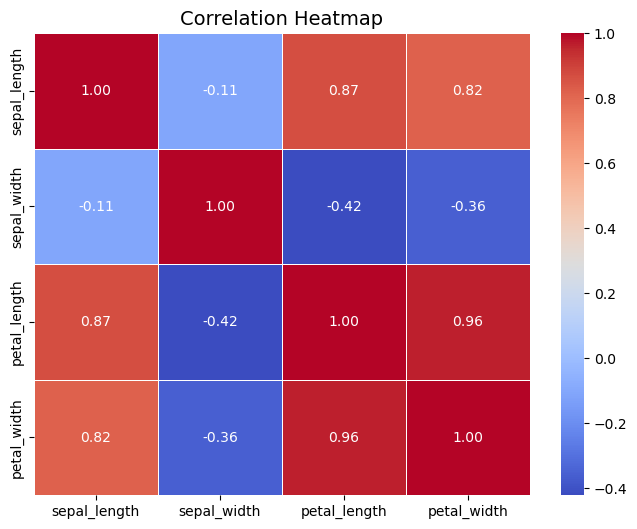

In [161]:
plt.figure(figsize=(8, 6))
sns.heatmap(x_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Train Test Split

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [165]:
x_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
47,4.6,3.2,1.4,0.2
121,5.6,2.8,4.9,2.0


In [166]:
x_test.head(3)

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
53,5.5,2.3,4.0,1.3
140,6.7,3.1,5.6,2.4


In [167]:
y_train.head(3)

137    2
47     0
121    2
Name: species, dtype: int32

In [168]:
y_test.head(3)

127    2
53     1
140    2
Name: species, dtype: int32

## Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [171]:
lR=LogisticRegression()
lR.fit(x_train,y_train)

LogisticRegression()

In [172]:
test_x_pred = lR.predict(x_test)

In [173]:
train_x_pred = lR.predict(x_train)

In [174]:
print("Accuracy of test data:",accuracy_score(y_test, test_x_pred))

Accuracy of test data: 0.9333333333333333


In [175]:
print("Accuracy of train data:",accuracy_score(y_train, train_x_pred))

Accuracy of train data: 0.9829059829059829


In [176]:
print("Confusion Matrix of test data:",confusion_matrix(y_test, test_x_pred))

Confusion Matrix of test data: [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [177]:
print("Confusion Matrix of train data:",confusion_matrix(y_train, train_x_pred))

Confusion Matrix of train data: [[37  0  0]
 [ 0 38  2]
 [ 0  0 40]]


In [178]:
print("Classification Report of test data:",classification_report(y_test, test_x_pred))

Classification Report of test data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [179]:
print("Classification Report of train data:",classification_report(y_train, train_x_pred))

Classification Report of train data:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.95      0.97        40
           2       0.95      1.00      0.98        40

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117



## KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [183]:
test_x_pred= knn.predict(x_test)

In [184]:
print("Accuracy:",accuracy_score(y_test, test_x_pred))

Accuracy: 0.9333333333333333


In [185]:
print("Confusion Matrix:",confusion_matrix(y_test, test_x_pred))

Confusion Matrix: [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [186]:
print("Classification Report:",classification_report(y_test, test_x_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Test the Prediction

In [188]:
new_data= pd.DataFrame({"sepal_length":[5.1],"sepal_width":[3.5],"petal_length":[1.4],"petal_width":[0.2]})

In [189]:
prediction = knn.predict(new_data)

In [190]:
print("Species:",prediction)
if(prediction==0):
    print("Iris-setosa")
elif(prediction==1):
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Species: [0]
Iris-setosa
